In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df_autoconsumo = pd.read_parquet('./data/tramita/exp_autoconsumo.parquet')

In [3]:
df_autoconsumo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25845 entries, 8789 to 1907928
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id_exp               25845 non-null  uint32        
 1   cod_procedimiento    25845 non-null  uint32        
 2   dni                  25332 non-null  Int32         
 3   nif                  513 non-null    Int32         
 4   fecha_alta_exp       25845 non-null  datetime64[us]
 5   fecha_registro_exp   25845 non-null  datetime64[us]
 6   codine_provincia     25845 non-null  string        
 7   codine_municipio     25845 non-null  string        
 8   codine               25845 non-null  string        
 9   municipio            25845 non-null  string        
 10  provincia            25845 non-null  string        
 11  unidad_tramitadora   3 non-null      string        
 12  denom_procedimiento  25845 non-null  string        
 13  desc_procedimiento   25845 non-

consejeria_proc      'Consejeria de desarrollo sostenible'
org_instructor_proc  'Direccion general de transicion energetica'
denom_procedimiento  'SLPT - Ayudas para actuaciones de autoconsumo en el sector residencial, las administraciones públicas y el tercer sector'
desc_procedimiento   'Convocatoria de los programas de incentivos 4 y 5 para actuaciones de autoconsumo, con fuentes de energias renovables, en el sector residencial, las administraciones publicas y el tercer sector.'
siaci                'SLPT'

In [4]:
columns_to_drop = ['org_instructor_proc',
                   'consejeria_proc',
                   'denom_procedimiento',
                   'desc_procedimiento',
                   'unidad_tramitadora',
                   'siaci',
                    'cod_procedimiento']
df_autoconsumo_simple = df_autoconsumo.drop(columns = columns_to_drop)

In [5]:
df_autoconsumo_simple.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25845 entries, 8789 to 1907928
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id_exp              25845 non-null  uint32        
 1   dni                 25332 non-null  Int32         
 2   nif                 513 non-null    Int32         
 3   fecha_alta_exp      25845 non-null  datetime64[us]
 4   fecha_registro_exp  25845 non-null  datetime64[us]
 5   codine_provincia    25845 non-null  string        
 6   codine_municipio    25845 non-null  string        
 7   codine              25845 non-null  string        
 8   municipio           25845 non-null  string        
 9   provincia           25845 non-null  string        
 10  es_telematica       25845 non-null  bool          
dtypes: Int32(2), bool(1), datetime64[us](2), string(5), uint32(1)
memory usage: 1.9 MB


In [6]:
df_autoconsumo_simple.head(20)

,id_exp,dni,nif,fecha_alta_exp,fecha_registro_exp,codine_provincia,codine_municipio,codine,municipio,provincia,es_telematica
8789,1127895,1787973,<NA>,2022-02-09 09:07:17,2021-12-23,13,064,13064,Poblete,Ciudad Real,True
9231,1189980,1817983,<NA>,2022-03-25 08:12:34,2022-03-24,45,099,45099,Méntrida,Toledo,True
9233,1190024,1818001,<NA>,2022-03-25 08:19:59,2022-03-24,45,192,45192,Villanueva de Alcardete,Toledo,True
9237,1190043,1818006,<NA>,2022-03-25 08:22:58,2022-03-24,13,034,13034,Ciudad Real,Ciudad Real,True
9308,1190807,1818334,<NA>,2022-03-28 09:06:24,2022-03-25,19,300,19300,Valdeaveruelo,Guadalajara,True
9311,1190830,741348,<NA>,2022-03-28 09:08:06,2022-03-25,28,050,28050,Cubas de la Sagra,Madrid,True
9312,1190835,1818347,<NA>,2022-03-28 09:10:02,2022-03-25,13,087,13087,Valdepeñas,Ciudad Real,True
9313,1190838,1818348,<NA>,2022-03-28 09:10:23,2022-03-25,45,087,45087,Madridejos,Toledo,True
9394,1191750,1818693,<NA>,2022-03-29 08:41:27,2022-03-26,45,123,45123,Ontígola,Toledo,True
9396,1191784,1075826,<NA>,2022-03-29 08:51:26,2022-03-28,45,163,45163,Sonseca,Toledo,True


# Plot grouped data

Process has two steps
1. Group per day
2. Resample to get a value for every day, constant frequency. Filling with 0 for non data days

In [7]:
df_autoconsumo_simple.set_index('fecha_registro_exp', inplace=True)

# Plot raw data, line plot, per day

In [8]:
df_autoconsumo_group_d = df_autoconsumo_simple.resample('D').agg(
    total_exp=('id_exp', 'count'),
    total_pfisica=('dni', 'nunique'),  
    total_pjuridica=('nif', 'nunique'),
    total_online=('es_telematica', 'sum'),
    total_presencial=('es_telematica', lambda x: (~x).sum())
).fillna(0).reset_index()

In [9]:
df_autoconsumo_group_d.head()

,fecha_registro_exp,total_exp,total_pfisica,total_pjuridica,total_online,total_presencial
0,2021-12-22,317,292,2,316,1
1,2021-12-23,282,263,3,282,0
2,2021-12-24,124,123,0,124,0
3,2021-12-25,22,22,0,22,0
4,2021-12-26,52,52,0,52,0


<Axes: title={'center': 'Total Expedientes'}, xlabel='fecha_registro_exp'>

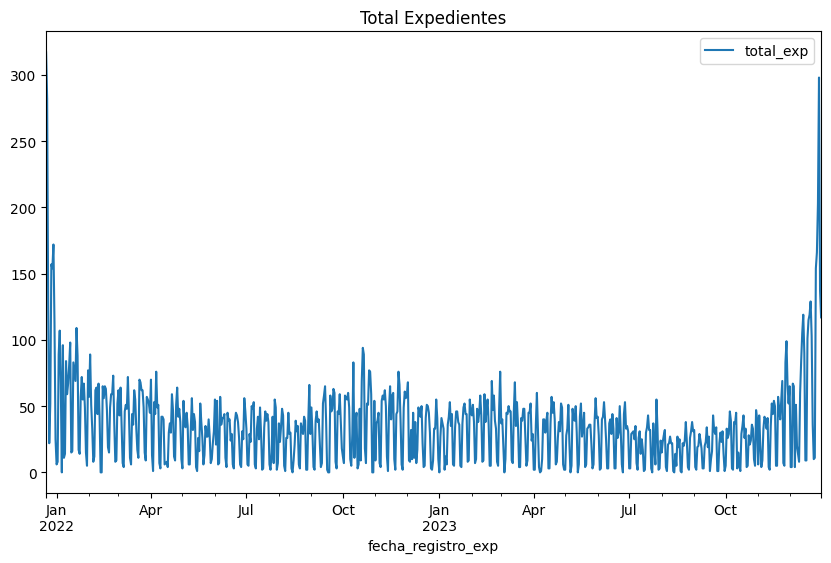

In [10]:
df_autoconsumo_group_d.set_index('fecha_registro_exp', inplace=True)
df_autoconsumo_group_d.plot( y='total_exp', figsize=(10, 6), title="Total Expedientes")

**Insights**

More files presented at the start and end of the period

In [11]:
(df_autoconsumo_group_d['total_exp'] == 0).sum()

17



**Seaborn**



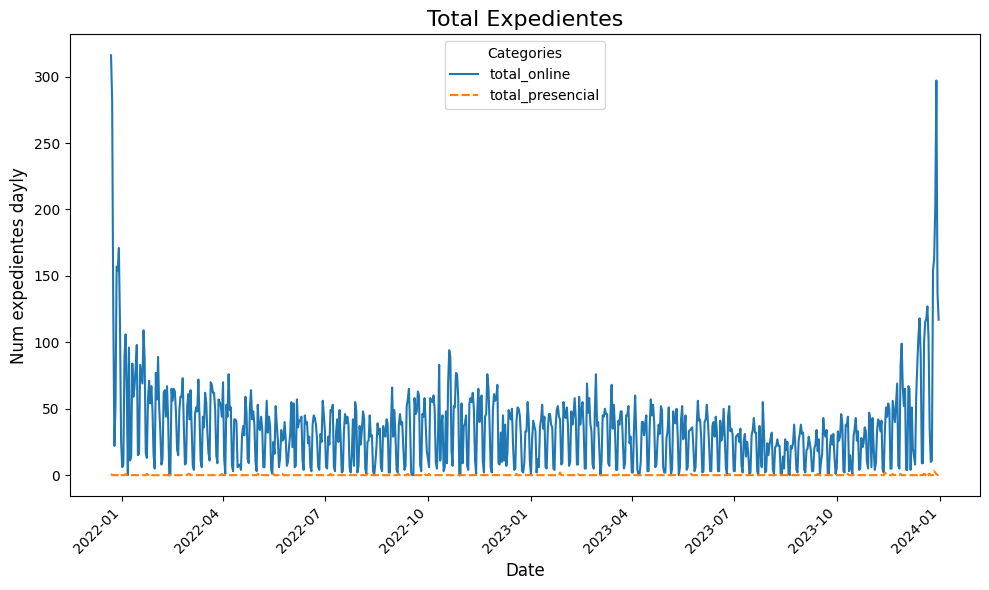

In [12]:
plt.figure(figsize=(10, 6))
#sns.lineplot(data=df_autoconsumo_group_d)
# columns = ['total_exp','total_online','total_presencial']
columns_to_plot = ['total_online','total_presencial']
sns.lineplot(data=df_autoconsumo_group_d[columns_to_plot])
#sns.lineplot(data=df_autoconsumo_group_d['total_exp','total_online','total_presencial'], dashes=True, markers=True)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.title('Total Expedientes', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Num expedientes dayly', fontsize=12)
plt.legend(title='Categories', fontsize=10)

plt.tight_layout()  # Adjust layout
plt.show()


# Plot daily, area plot

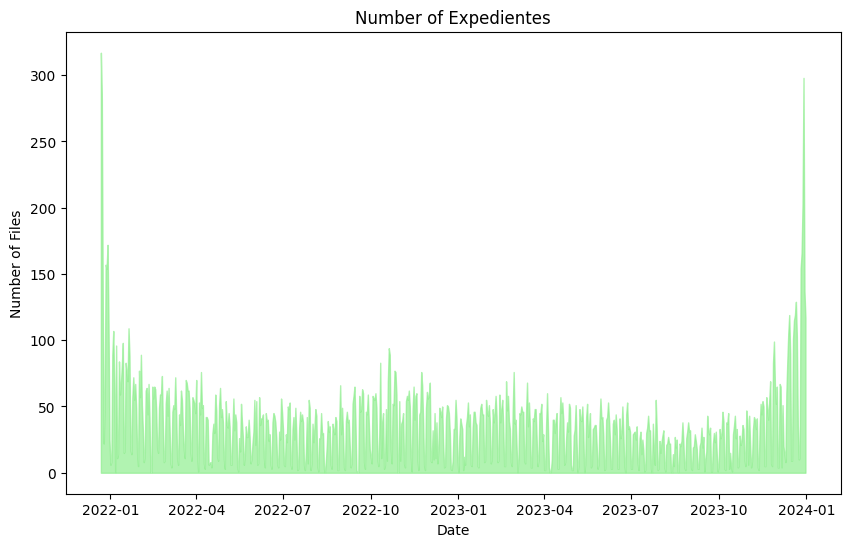

In [13]:
# Area plot
plt.figure(figsize=(10, 6))
plt.fill_between(df_autoconsumo_group_d.index, df_autoconsumo_group_d['total_exp'], color='lightgreen', alpha=0.7)
plt.title('Number of Expedientes')
plt.xlabel('Date')
plt.ylabel('Number of Files')
plt.show()

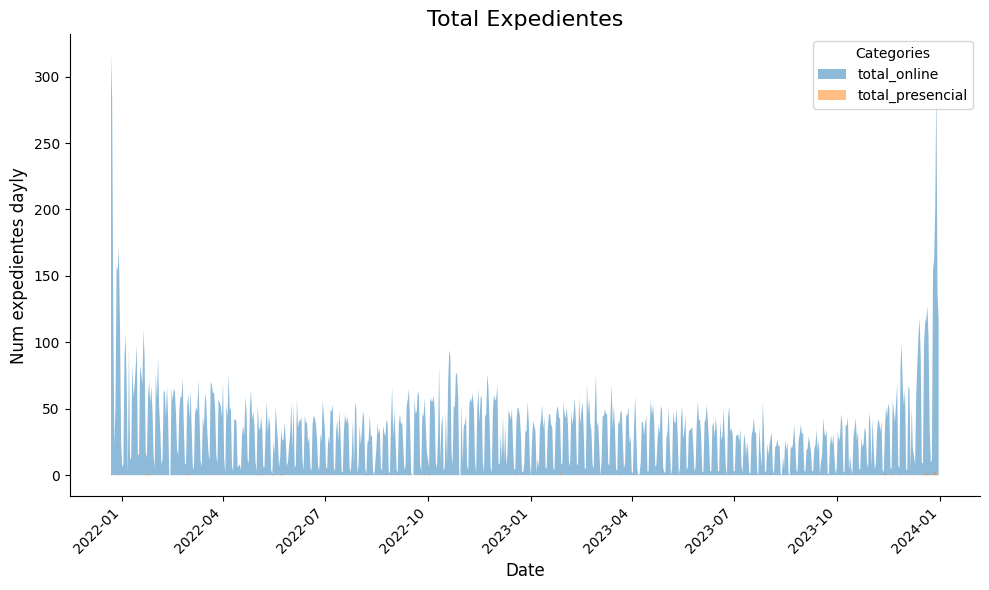

In [14]:
plt.figure(figsize=(10, 6))
#sns.lineplot(data=df_autoconsumo_group_d)
# columns = ['total_exp','total_online','total_presencial']
columns_to_plot = ['total_online','total_presencial']

# Plot each column as an area
for column in columns_to_plot:
    plt.fill_between(df_autoconsumo_group_d.index, 
                     df_autoconsumo_group_d[column], 
                     alpha=0.5, label=column)

# Add Seaborn styling
sns.despine()  # Removes top and right spines

#sns.lineplot(data=df_autoconsumo_group_d['total_exp','total_online','total_presencial'], dashes=True, markers=True)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.title('Total Expedientes', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Num expedientes dayly', fontsize=12)
plt.legend(title='Categories', fontsize=10)

plt.tight_layout()  # Adjust layout
plt.show()

# Bar plot per day

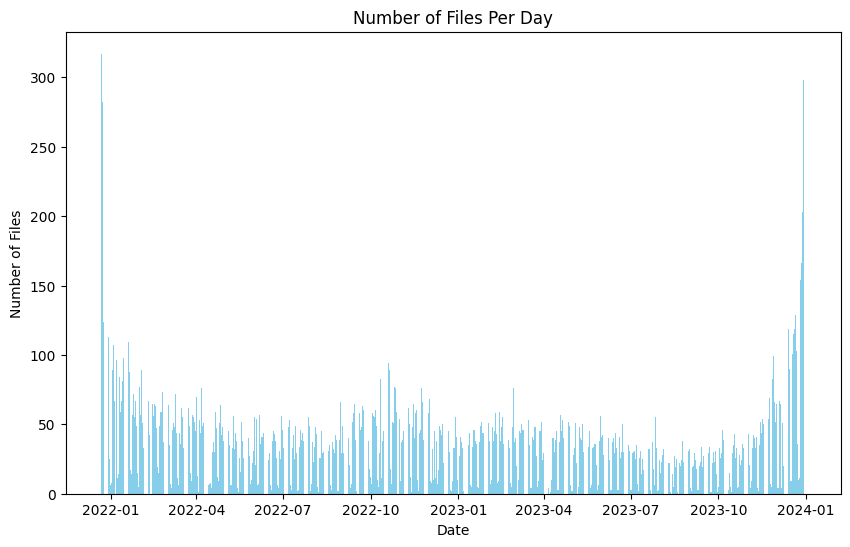

In [15]:
# Bar plot
plt.figure(figsize=(10, 6))
plt.bar(df_autoconsumo_group_d.index, df_autoconsumo_group_d['total_exp'], color='skyblue')
plt.title('Number of Files Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Files')
plt.show()

## Plot per day, rolling window 7 days

In [16]:
df_autoconsumo_group_d_rolling = df_autoconsumo_group_d['total_exp'].rolling(window=7).mean().reset_index(name='total_exp_roll7')  # 7-day rolling average

In [17]:
df_autoconsumo_group_d_rolling.head()

,fecha_registro_exp,total_exp_roll7
0,2021-12-22,NaN
1,2021-12-23,NaN
2,2021-12-24,NaN
3,2021-12-25,NaN
4,2021-12-26,NaN


<Axes: title={'center': 'Total Expedientes'}, xlabel='fecha_registro_exp'>

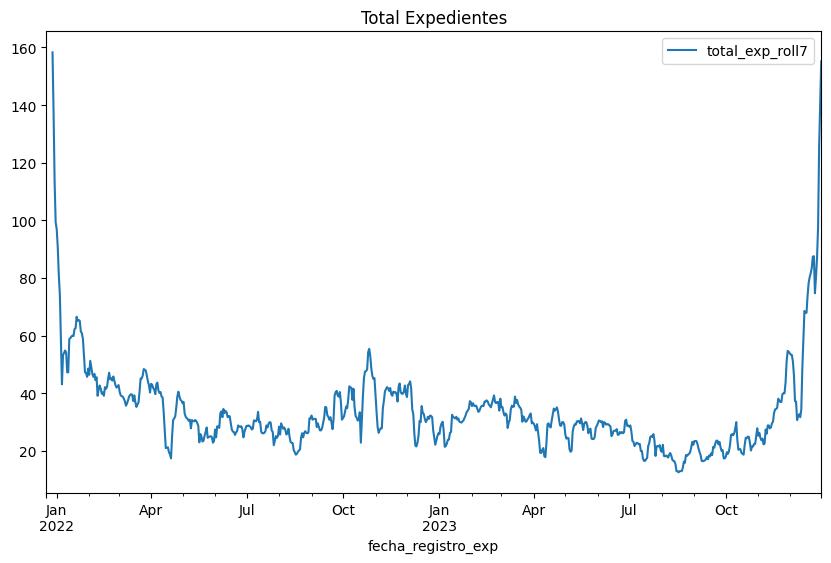

In [18]:
df_autoconsumo_group_d_rolling.set_index('fecha_registro_exp', inplace=True)
df_autoconsumo_group_d_rolling.plot( y='total_exp_roll7', figsize=(10, 6), title="Total Expedientes")

# Plot weekly

In [19]:
df_autoconsumo_group_w = df_autoconsumo_simple.resample('W').agg(
    total_exp=('id_exp', 'count'),
    total_pfisica=('dni', 'nunique'),  
    total_pjuridica=('nif', 'nunique'),
    total_online=('es_telematica', 'sum'),
    total_presencial=('es_telematica', lambda x: (~x).sum())
).fillna(0).reset_index()

<Axes: title={'center': 'Total Expedientes'}, xlabel='fecha_registro_exp'>

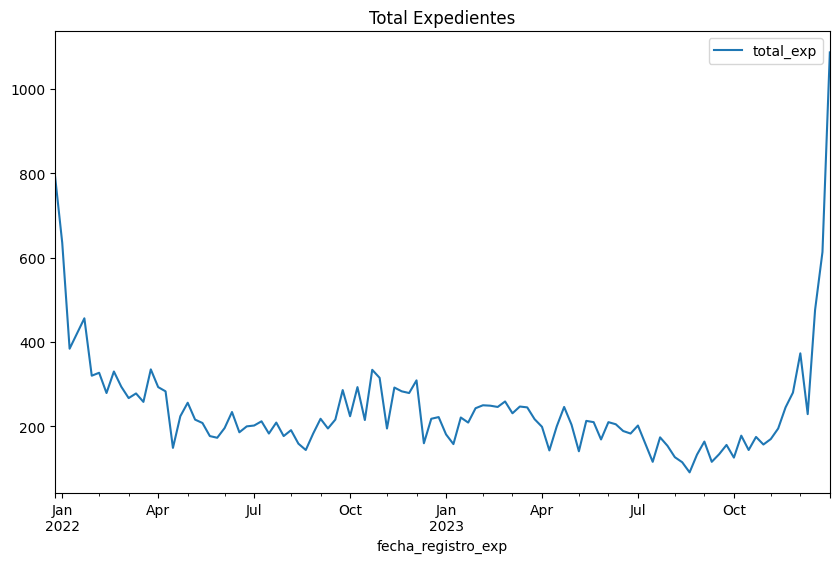

In [20]:
df_autoconsumo_group_w.set_index('fecha_registro_exp', inplace=True)
df_autoconsumo_group_w.plot( y='total_exp', figsize=(10, 6), title="Total Expedientes")

# Weekly, area plot

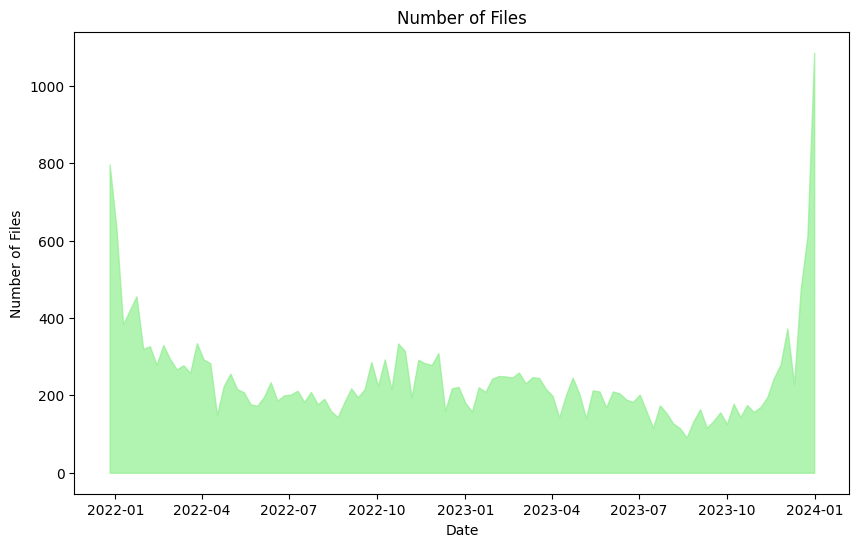

In [21]:
# Area plot
plt.figure(figsize=(10, 6))
plt.fill_between(df_autoconsumo_group_w.index, df_autoconsumo_group_w['total_exp'], color='lightgreen', alpha=0.7)
plt.title('Number of Files')
plt.xlabel('Date')
plt.ylabel('Number of Files')
plt.show()

# Bar plot weekly

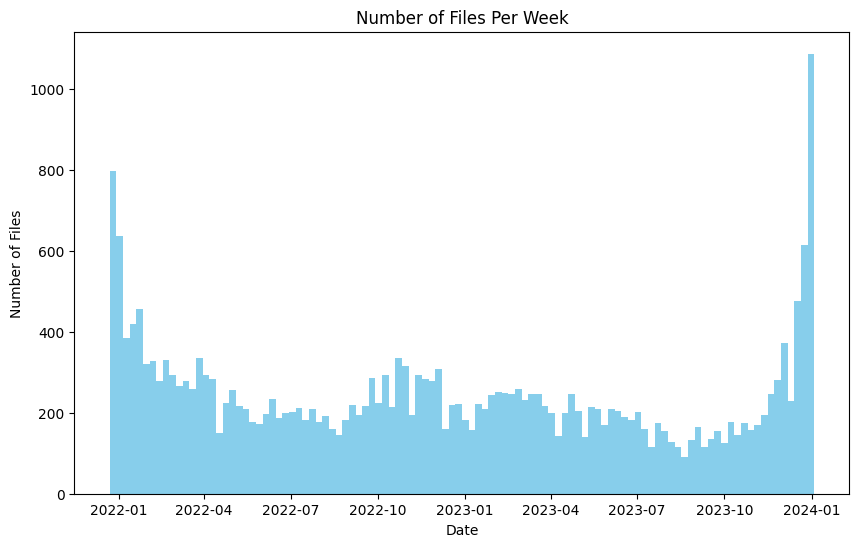

In [22]:
# Bar plot
bar_width = 7 # 7 days
plt.figure(figsize=(10, 6))
plt.bar(df_autoconsumo_group_w.index, df_autoconsumo_group_w['total_exp'], width=bar_width, align='center', color='skyblue')
plt.title('Number of Files Per Week')
plt.xlabel('Date')
plt.ylabel('Number of Files')
plt.show()

# width=bar_width: Ensures the bars span the entire time period (7 days for weekly data).
# align='center': Centers the bar around the weekly period.

## **Plotly**

In [23]:
df_autoconsumo_group_w.head()

,total_exp,total_pfisica,total_pjuridica,total_online,total_presencial
fecha_registro_exp,,,,,
2021-12-26,797,740,5,796,1
2022-01-02,635,622,4,634,1
2022-01-09,384,358,4,383,1
2022-01-16,420,410,6,420,0
2022-01-23,456,439,5,455,1


In [24]:
import plotly.io as pio
pio.renderers.default = "notebook"

In [25]:
# Then in a new cell, load the extension
%matplotlib inline
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

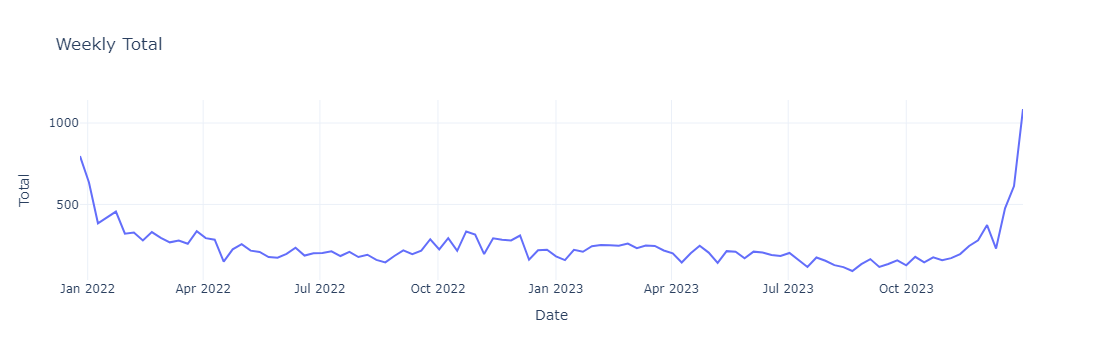

In [26]:
fig = px.line(df_autoconsumo_group_w, 
              x=df_autoconsumo_group_w.index, 
              y='total_exp',
              title='Weekly Total')

# Optional: Customize layout
fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Total",
    template="plotly_white"
)

# Display plot
fig.show()

## Plotly bar plot

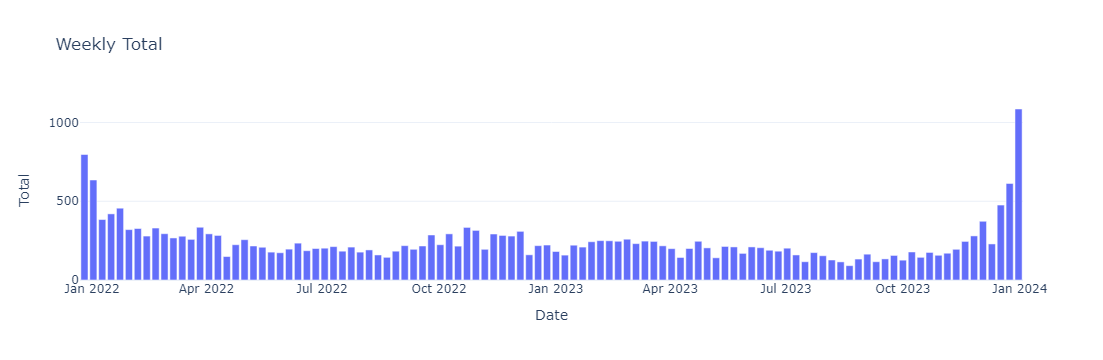

In [39]:
fig = px.bar(df_autoconsumo_group_w,
             x=df_autoconsumo_group_w.index,
             y='total_exp',
             title='Weekly Total')

# Optional: Customize layout
fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Total",
    template="plotly_white"
)

# Display plot
fig.show()

## Plotly area

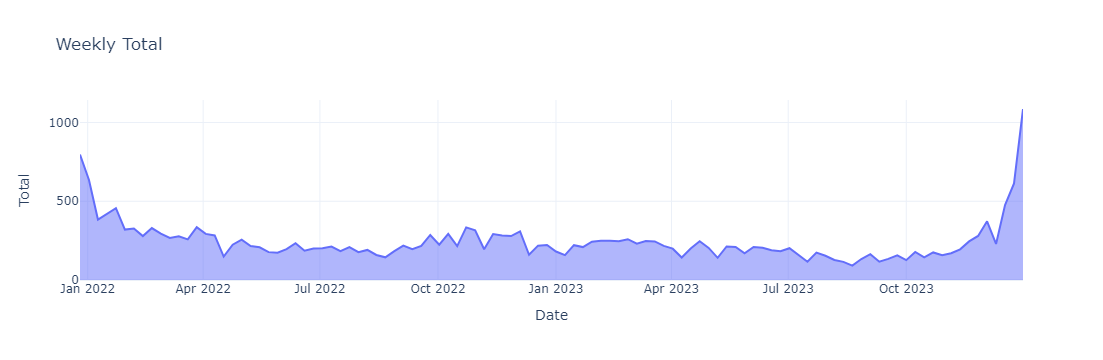

In [41]:
# Area plot
fig = px.area(df_autoconsumo_group_w,
              x=df_autoconsumo_group_w.index,
              y='total_exp',
              title='Weekly Total')
# Optional: Customize layout
fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Total",
    template="plotly_white"
)

# Display plot
fig.show()

## Plotly monthly distribution

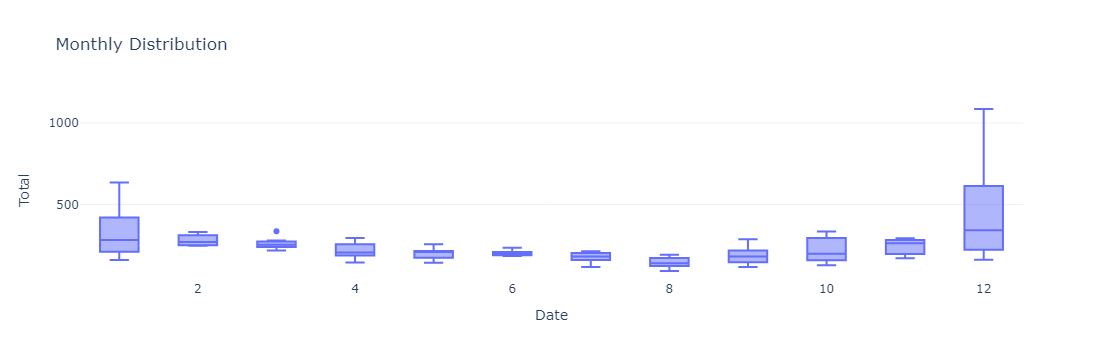

In [44]:
fig = px.box(df_autoconsumo_group_w,
             x=df_autoconsumo_group_w.index.month,  # group by month
             y='total_exp',
             title='Monthly Distribution')
# Optional: Customize layout
fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Total",
    template="plotly_white"
)

# Display plot
fig.show()

## Heatmap plotly

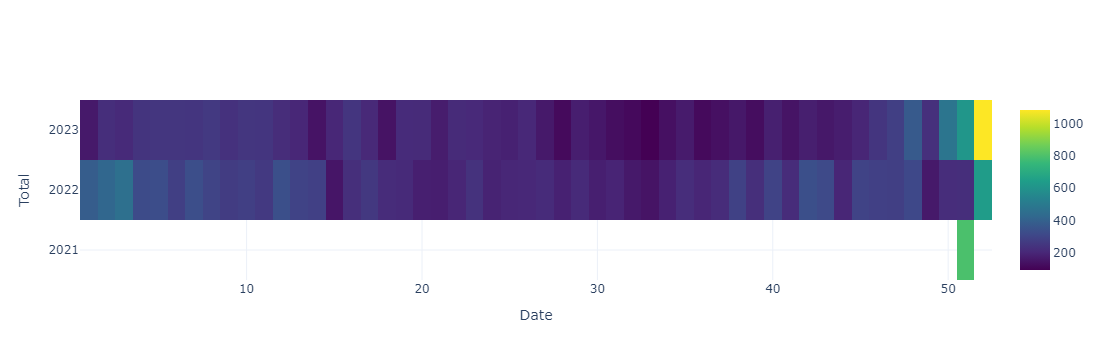

In [47]:
# Calendar heatmap using graph_objects
import plotly.graph_objects as go

# For heatmap
fig = go.Figure(data=go.Heatmap(
    x=df_autoconsumo_group_w.index.isocalendar().week,
    y=df_autoconsumo_group_w.index.year,
    z=df_autoconsumo_group_w['total_exp'],
    colorscale='Viridis'))

# Optional: Customize layout
fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Total",
    template="plotly_white"
)

# Display plot
fig.show()

# Plot rolling weekly

Not realistic, better to plot real data 

In [29]:
df_autoconsumo_group_w_rolling = df_autoconsumo_group_w['total_exp'].rolling(window=7).mean().reset_index(name='total_exp_roll7')  # 7-day rolling average

<Axes: title={'center': 'Total Expedientes'}, xlabel='fecha_registro_exp'>

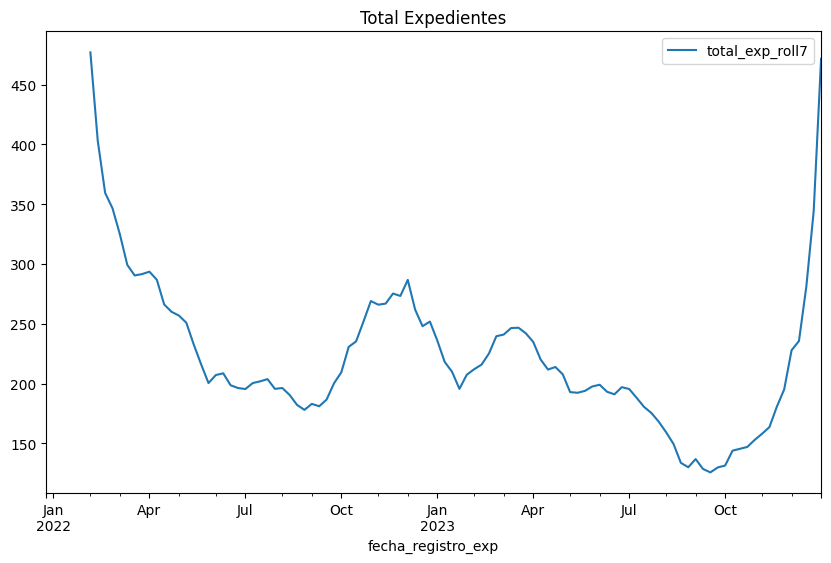

In [30]:
df_autoconsumo_group_w_rolling.set_index('fecha_registro_exp', inplace=True)
df_autoconsumo_group_w_rolling.plot( y='total_exp_roll7', figsize=(10, 6), title="Total Expedientes")

# Plot monthly

In [31]:
df_autoconsumo_group_m = df_autoconsumo_simple.resample('ME').agg(
    total_exp=('id_exp', 'count'),
    total_pfisica=('dni', 'nunique'),  
    total_pjuridica=('nif', 'nunique'),
    total_online=('es_telematica', 'sum'),
    total_presencial=('es_telematica', lambda x: (~x).sum())
).fillna(0).reset_index()

<Axes: title={'center': 'Total Expedientes'}, xlabel='fecha_registro_exp'>

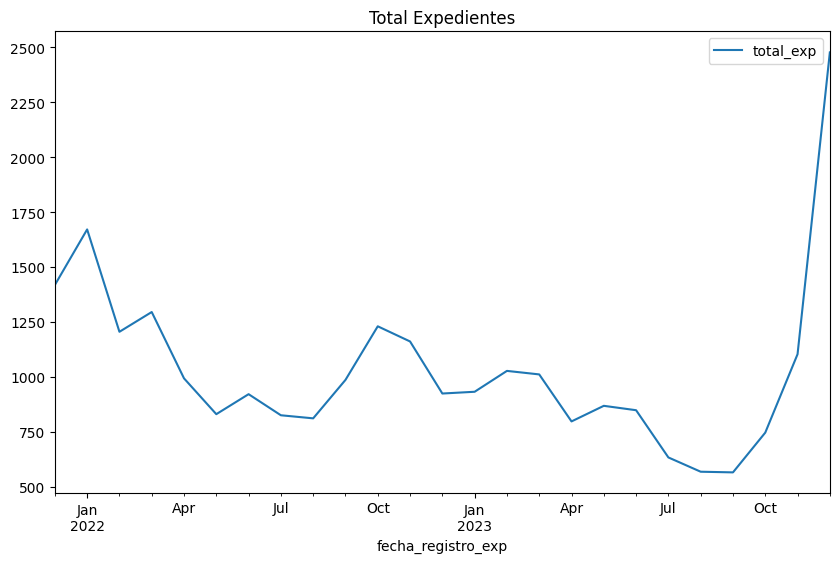

In [32]:
df_autoconsumo_group_m.set_index('fecha_registro_exp', inplace=True)
df_autoconsumo_group_m.plot( y='total_exp', figsize=(10, 6), title="Total Expedientes")

# Area plot, monthly

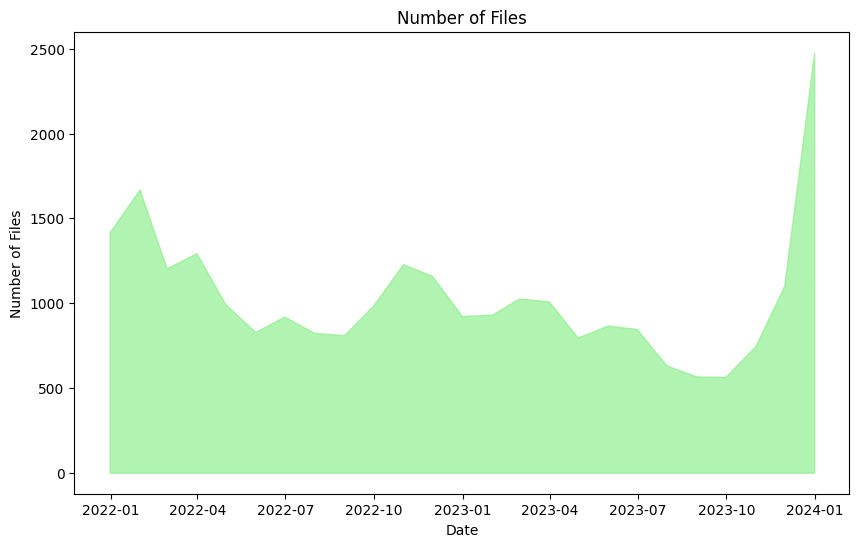

In [33]:
# Area plot
plt.figure(figsize=(10, 6))
plt.fill_between(df_autoconsumo_group_m.index, df_autoconsumo_group_m['total_exp'], color='lightgreen', alpha=0.7)
plt.title('Number of Files')
plt.xlabel('Date')
plt.ylabel('Number of Files')
plt.show()

# Bar plot, monthly

In [34]:
# Calculate dynamic bar widths
start_dates = df_autoconsumo_group_m.index - pd.offsets.MonthBegin(1)  # Start of each month
end_dates = df_autoconsumo_group_m.index                             # End of each month
bar_widths = (end_dates - start_dates).days                # Days in each month

In [35]:
type(bar_widths)

pandas.core.indexes.base.Index

In [36]:
len(bar_widths)

25

In [37]:
df_autoconsumo_group_m.head()

,total_exp,total_pfisica,total_pjuridica,total_online,total_presencial
fecha_registro_exp,,,,,
2021-12-31,1418,1345,9,1416,2
2022-01-31,1671,1588,23,1667,4
2022-02-28,1205,1163,13,1205,0
2022-03-31,1295,1234,28,1292,3
2022-04-30,993,960,12,993,0


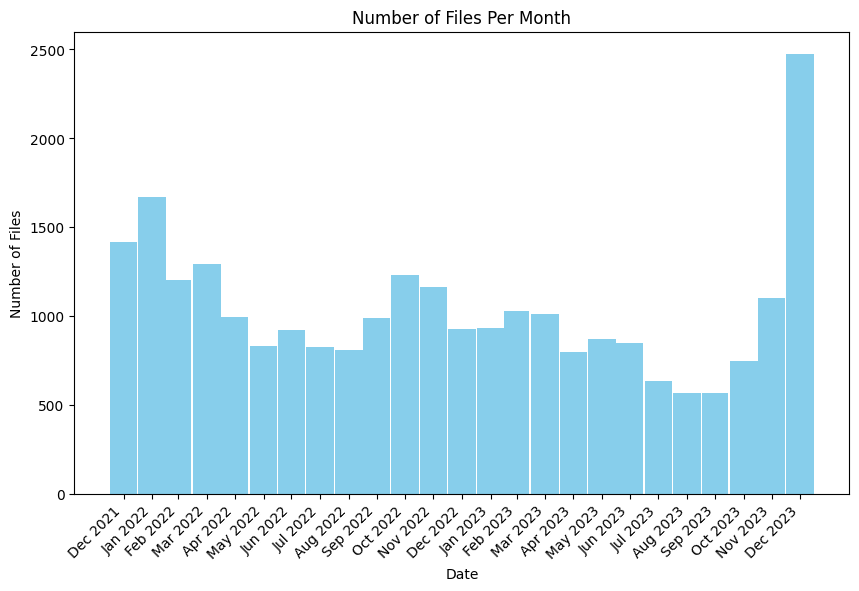

In [38]:
# Bar plot
bar_width = 30 # 7 days
plt.figure(figsize=(10, 6))
plt.bar(df_autoconsumo_group_m.index, df_autoconsumo_group_m['total_exp'], width=bar_widths, align='center', color='skyblue')
#plt.bar(df_autoconsumo_group_m.index, df_autoconsumo_group_m['total_exp'], color='skyblue')
plt.title('Number of Files Per Month')
plt.xlabel('Date')
plt.ylabel('Number of Files')
# Set x-axis labels to show each month
plt.xticks(df_autoconsumo_group_m.index, 
           labels=df_autoconsumo_group_m.index.strftime('%b %Y'),  # Format as "Jan 2023", "Feb 2023", etc.
           rotation=45, ha='right')  # Rotate for better readability

plt.show()

# width=bar_width: Ensures the bars span the entire time period (7 days for weekly data).
# align='center': Centers the bar around the weekly period.

## Bokeh

In [54]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [55]:
# Prepare data for Bokeh
source = ColumnDataSource(data=dict(
    x=df_autoconsumo_group_m.index, 
    y=df_autoconsumo_group_m['total_exp']
))

# Create bar plot
p = figure(title="Files Submitted Per Month", x_axis_type="datetime", width=800, height=400)
p.vbar(x='x', top='y', width=20*86400000, source=source, color="skyblue", legend_label="Files")

# Add hover tool
hover = HoverTool(tooltips=[("Month", "@x{%F}"), ("Exp month", "@y")], formatters={'@x': 'datetime'})
p.add_tools(hover)

p.xaxis.axis_label = "Month"
p.yaxis.axis_label = "Number of Files"
p.legend.location = "top_left"
show(p)

## Bokeh area plot

In [56]:
# Prepare data for Bokeh
source = ColumnDataSource(data=dict(
    x=df_autoconsumo_group_m.index, 
    y=df_autoconsumo_group_m['total_exp']
))

# Create the area plot
p = figure(title="Total Files Per Month (Area Plot)", x_axis_type="datetime", width=800, height=400)
p.varea(x='x', y1=0, y2='y', source=source, fill_color="lightgreen", alpha=0.6)
p.line(x='x', y='y', source=source, color="green", line_width=2, legend_label="Total Files")

# Add hover tool
hover = HoverTool(tooltips=[("Month", "@x{%F}"), ("Files month", "@y")], formatters={'@x': 'datetime'})
p.add_tools(hover)

# Customize plot
p.xaxis.axis_label = "Month"
p.yaxis.axis_label = "Total Files"
p.legend.location = "top_left"
show(p)

## Bokeh stacked 

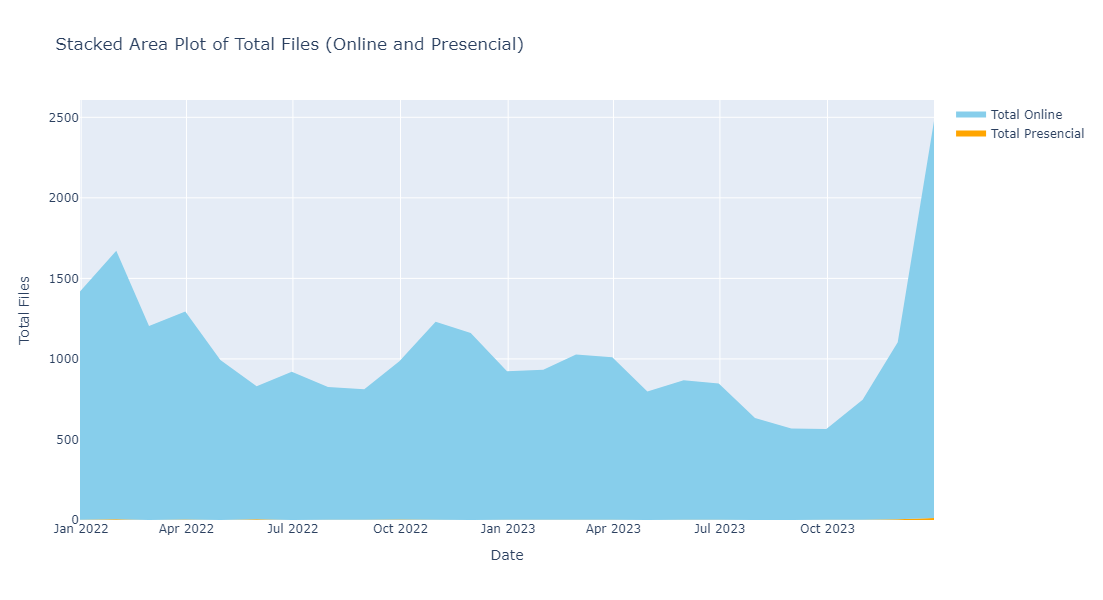

In [75]:
import plotly.graph_objects as go

# Prepare the data (assuming df_autoconsumo_group_m has datetime index and required columns)
df_b = df_autoconsumo_group_m.reset_index()

# Create the stacked area plot
fig = go.Figure()

# Add the area for total_presencial
fig.add_trace(go.Scatter(
    x=df_b['fecha_registro_exp'],
    y=df_b['total_presencial'],
    mode='none',
    stackgroup='one',  # Stack the areas
    fill='tonexty',  # Fill the area below the line
    name='Total Presencial',
    fillcolor='orange',
    hoverinfo='x+y+name'  # Display x (date), y (value), and name (category)
))

# Add the area for total_online
fig.add_trace(go.Scatter(
    x=df_b['fecha_registro_exp'],
    y=df_b['total_online'],
    mode='none',
    stackgroup='one',  # Stack the areas
    fill='tonexty',  # Fill the area below the line
    name='Total Online',
    fillcolor='skyblue',
    hoverinfo='x+y+name'  # Display x (date), y (value), and name (category)
))


# Update layout
fig.update_layout(
    title="Stacked Area Plot of Total Files (Online and Presencial)",
    xaxis_title="Date",
    yaxis_title="Total Files",
    width=1000,  # Increase width for better visibility
    height=600,  # Increase height for better visibility
    hovermode="x unified",  # Show hover info in a unified box
    hoverlabel=dict(
        font_size=10,  # Set the font size to 10 (smaller)
        font_family="Arial",  # Set the font family to Arial (optional)
    )
)
# Show the plot
fig.show()


## Bokeh heatmap

In [64]:
from bokeh.plotting import figure, show
from bokeh.transform import linear_cmap
from bokeh.palettes import Viridis256
from bokeh.models import ColumnDataSource, ColorBar, LinearColorMapper

# Prepare data: extract years and months
df_autoconsumo_group_m['Year'] = df_autoconsumo_group_m.index.year.astype(str)  # Convert Year to string
df_autoconsumo_group_m['Month'] = df_autoconsumo_group_m.index.month.astype(str)  # Convert Month to string

# Aggregate data by year and month
heatmap_data = df_autoconsumo_group_m.groupby(['Year', 'Month'])['total_exp'].sum().reset_index()

# Create ColumnDataSource
source = ColumnDataSource(heatmap_data)

# Create a color mapper
color_mapper = LinearColorMapper(palette=Viridis256, low=heatmap_data['total_exp'].min(), high=heatmap_data['total_exp'].max())


# Create the heatmap plot
p = figure(
    title="Heatmap of Total Expenditure",
    x_range=sorted(heatmap_data['Year'].unique()),  # Sorted Years as x-axis
    y_range=[str(i) for i in range(1, 13)],         # Months (1-12 as strings) as y-axis
    width=800,
    height=400,
    tools="hover",
    tooltips=[("Year", "@Year"), ("Month", "@Month"), ("Total", "@total_exp")]
)

# Add rectangles to the heatmap
p.rect(
    x="Year", 
    y="Month", 
    width=1, 
    height=1, 
    source=source,
    fill_color=linear_cmap('total_exp', Viridis256, low=heatmap_data['total_exp'].min(), high=heatmap_data['total_exp'].max()),
    line_color=None
)

# Add a color bar
color_bar = ColorBar(color_mapper=color_mapper, location=(0, 0), title="Total Expenditure")
p.add_layout(color_bar, 'right')  # Add the color bar to the right side of the plot


# Customize axis labels
p.xaxis.axis_label = "Year"
p.yaxis.axis_label = "Month"
show(p)


## Altair plots


In [67]:
import altair as alt

# Reset the index for Altair
df_altair = df_autoconsumo_group_m.reset_index()

# Create the bar plot
bar = alt.Chart(df_altair).mark_bar(color="skyblue").encode(
    x=alt.X('fecha_registro_exp:T', title="Date"),  # Use the datetime index
    y=alt.Y('total_exp:Q', title="Total Files"),
    tooltip=['fecha_registro_exp:T', 'total_exp:Q']  # Add tooltips
).properties(
    title="Total Files Per Month",
    width=800,
    height=400
)

bar

alt.Chart(...)

In [68]:
import altair as alt

# Reset the index for Altair
df_altair = df_autoconsumo_group_m.reset_index()

# Create the area plot
area = alt.Chart(df_altair).mark_area(color="skyblue", opacity=0.5).encode(
    x=alt.X('fecha_registro_exp:T', title="Date"),  # Use the datetime index
    y=alt.Y('total_exp:Q', title="Total Files"),
    tooltip=['fecha_registro_exp:T', 'total_exp:Q']  # Add tooltips
).properties(
    title="Total Files Per Month",
    width=800,
    height=400
)

area

alt.Chart(...)

In [69]:
import altair as alt

# Create a scatter plot
scatter = alt.Chart(df_altair).mark_point(color="red").encode(
    x=alt.X('fecha_registro_exp:T', title="Date"),
    y=alt.Y('total_exp:Q', title="Total Files"),
    tooltip=['fecha_registro_exp:T', 'total_exp:Q']
).properties(
    title="Scatter Plot of Total Files Per Month",
    width=800,
    height=400
)

scatter

alt.Chart(...)

In [71]:
import altair as alt

# Reset the index for Altair
df_altair = df_autoconsumo_group_m.reset_index()

# Create the stacked area plot for total_online and total_presencial
stacked_area = alt.Chart(df_altair).mark_area().encode(
    x=alt.X('fecha_registro_exp:T', title="Date"),  # Use the datetime index
    y=alt.Y('value:Q', stack='zero', title="Total Files"),
    color=alt.Color('variable:N', title="File Type"),
    tooltip=['fecha_registro_exp:T', 'variable:N', 'value:Q']  # Add tooltips
).transform_fold(
    ['total_online', 'total_presencial'],  # Only these two columns
    as_=['variable', 'value']  # 'variable' and 'value' columns
).properties(
    title="Stacked Area Plot of Total Files (Online and Presencial)",
    width=800,
    height=400
)

stacked_area


alt.Chart(...)